In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from geopandas.tools import sjoin
import re
import shapely

from shapely.geometry import Polygon
from shapely.geometry import Point

In [2]:
%matplotlib inline
sns.set()

In [3]:
regions = pd.read_csv("./data/regions.csv", dtype={"number" : "str"},sep=",")
calls = pd.read_csv("./data/policecalls.csv", dtype={"number" : "str"},sep=",")

In [4]:
regions.head()

,FID,GID,COD_BAIRRO,NOME,COD_BA_IBGE,AREA,M2_RES,M2_COM,M2_SER,M2_IND,...,VA1,VAL_M2_COM,VAL_M2_SER,VAL_M2_TER,VAL_M2_RES,FONTE,ANO_REF,REGIONAL,MUNICIPIO,THE_GEOM
0,Bairros.fid-2be50750_153af4824fe_2bc9,6,88,PASSARE,230440070088,7167306.57,624073.98,155787.41,7857.90,4306.50,...,0.00,2339.57,2606.88,227.87,2424.77,SEFIN/PMF,2015,6,Fortaleza,POLYGON ((-38.539819067859945 -3.7955371068432...
1,Bairros.fid-2be50750_153af4824fe_2bca,21,110,CAIS DO PORTO,230440005110,2562799.52,82298.45,209764.75,1226.91,80588.26,...,300.00,3019.32,1599.36,253.73,2627.39,SEFIN/PMF,2015,2,Fortaleza,POLYGON ((-38.479334495231086 -3.7209126986722...
2,Bairros.fid-2be50750_153af4824fe_2bcb,22,111,CIDADE 2000,230440005111,497197.33,224347.86,36258.14,3588.02,315.30,...,5058781.89,2454.16,2596.93,0.00,2437.00,SEFIN/PMF,2015,2,Fortaleza,POLYGON ((-38.467647506862534 -3.7496832300526...
3,Bairros.fid-2be50750_153af4824fe_2bcc,23,93,ALTO DA BALANCA,230440075093,916449.74,209265.37,73728.61,5882.62,505.85,...,0.00,1843.36,2042.39,232.30,1784.38,SEFIN/PMF,2015,6,Fortaleza,POLYGON ((-38.51716445420212 -3.76997951516616...
4,Bairros.fid-2be50750_153af4824fe_2bcd,17,6,BARRA DO CEARA,230440005006,4240250.82,349881.25,243711.76,7352.28,59991.98,...,0.00,1669.99,1491.65,186.89,1551.97,SEFIN/PMF,2015,1,Fortaleza,POLYGON ((-38.56887758295916 -3.70168935573553...


In [5]:
calls["lat"] = calls.lat.apply(pd.to_numeric, args=('coerce',))
calls["lng"] = calls.lng.apply(pd.to_numeric, args=('coerce',))

In [6]:
for num in range(0, len(regions)):
    data = regions.THE_GEOM[num].replace('POLYGON ((', '').replace('))', '').strip()
    res = []
    for rec in data.split(', '):
        res.append(tuple(float(val) for val in rec.split()))
    poly = Polygon(res)
    regions["THE_GEOM"][num] = poly

#data = regions.geometry[0].replace('POLYGON ((', '').replace('))', '').strip()
#res = []
#for rec in data.split(', '):
#    res.append(tuple(float(val) for val in rec.split()))
#type(res)
#poly = Polygon(res)
#type(poly)



#type(regions.geometry[0])
#regions.geometry[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [7]:
calls["geometry"] = calls.apply(lambda z: Point(z.lng, z.lat), axis=1)
regions["geometry"] = gpd.GeoSeries(regions["THE_GEOM"])


In [8]:
type(regions.THE_GEOM[0])

shapely.geometry.polygon.Polygon

In [9]:
calls_gdf = gpd.GeoDataFrame(calls)
regions_gdf = gpd.GeoDataFrame(regions)

In [10]:
calls_gdf.crs
regions_gdf.crs
calls_gdf.crs = {"init": "epsg:4326"}
regions_gdf.crs = {"init": "epsg:4326"}

In [11]:
#regions_gdf["geometry"].to_crs({'init': 'epsg:3395'})
type(regions_gdf.geometry[0])

shapely.geometry.polygon.Polygon

In [12]:
calls_gdf = calls_gdf[calls_gdf.is_valid == True]
#regions_gdf = regions_gdf[regions_gdf.is_valid == True]

In [13]:
columns_of_interest = ["NOME", "VAL_M2_RES", "geometry"]
regions_gdf = regions_gdf[columns_of_interest]
regions_gdf.columns = ["BAIRRO", "VAL_M2_RES", "geometry"]
columns_of_interest = ["date", "type", "geometry"]
calls_gdf = calls_gdf[columns_of_interest]
calls_gdf.columns = ["DATA", "BAIRRO", "geometry"]

In [14]:
#regions_gdf[regions_gdf["geometry"].isnull() == True]

In [15]:
#merged_gdf = gpd.sjoin(calls_gdf, regions_gdf, how="inner", op="intersects")
#calls_gdf["BAIRRO"][0] = "TESTE"

In [16]:
calls_gdf.head()

,DATA,BAIRRO,geometry
0,2005-01-01,PROPERTY CRIMES,POINT (-38.5554 -3.73784)
1,2005-01-01,PROPERTY CRIMES,POINT (-38.5606 -3.83914)
2,2005-01-01,PROPERTY CRIMES,POINT (-38.5778 -3.72623)
3,2005-01-01,PROPERTY CRIMES,POINT (-38.501 -3.795)
4,2005-01-01,PROPERTY CRIMES,POINT (-38.4813 -3.72222)


In [17]:
regions_gdf.head()

,BAIRRO,VAL_M2_RES,geometry
0,PASSARE,2424.77,POLYGON ((-38.53981906785994 -3.79553710684326...
1,CAIS DO PORTO,2627.39,POLYGON ((-38.47933449523109 -3.72091269867228...
2,CIDADE 2000,2437.00,POLYGON ((-38.46764750686253 -3.74968323005262...
3,ALTO DA BALANCA,1784.38,POLYGON ((-38.51716445420212 -3.76997951516616...
4,BARRA DO CEARA,1551.97,POLYGON ((-38.56887758295916 -3.70168935573553...


In [18]:
#pat = re.compile(r'''(-*\d+\.\d+ -*\d+\.\d+);*''')

In [19]:


#point = Point(-38.5554, -3.73784)
#for num in range(0, len(regions_gdf)):
#    s = regions_gdf.get_value(num, "geometry")
#    matches = pat.findall(s)
#    if matches:
#        lst = [tuple(map(float, m.split())) for m in matches]
#    polygon = Polygon(lst)
#    print(regions_gdf.get_value(num, "BAIRRO"), " => ", polygon.contains(point))

In [20]:
type(calls_gdf.geometry[0])

shapely.geometry.point.Point

<code>qtd = 0
for numb in range(0, len(calls_gdf)):
    s1 = calls_gdf.get_value(numb, "geometry")
    point = Point(s1)
    for num in range(0, len(regions_gdf)):
        s = regions_gdf.get_value(num, "geometry")
        matches = pat.findall(s)
        if matches:
            lst = [tuple(map(float, m.split())) for m in matches]
        polygon = Polygon(lst)
        #print("Tentando...")
        if(polygon.contains(point)):
            qtd += 1
            print(qtd)
            calls_gdf["BAIRRO"][numb] = regions_gdf.get_value(num, "BAIRRO")
            continue
            #print(regions_gdf.get_value(num, "BAIRRO"), " => ", polygon.contains(point))
</code>

In [21]:
merged_gdf = gpd.sjoin(calls_gdf, regions_gdf, how="inner", op="intersects")

In [22]:
merged_gdf

,DATA,BAIRRO_left,geometry,index_right,BAIRRO_right,VAL_M2_RES
0,2005-01-01,PROPERTY CRIMES,POINT (-38.5554 -3.73784),116,PARQUELANDIA,2509.18
211,2005-01-04,PROPERTY CRIMES,POINT (-38.5592 -3.73552),116,PARQUELANDIA,2509.18
303,2005-01-05,PROPERTY CRIMES,POINT (-38.5553 -3.73816),116,PARQUELANDIA,2509.18
444,2005-01-07,PROPERTY CRIMES,POINT (-38.567 -3.73716),116,PARQUELANDIA,2509.18
527,2005-01-08,PROPERTY CRIMES,POINT (-38.5662 -3.74159),116,PARQUELANDIA,2509.18
662,2005-01-10,PROPERTY CRIMES,POINT (-38.5525 -3.73876),116,PARQUELANDIA,2509.18
700,2005-01-10,PROPERTY CRIMES,POINT (-38.5578 -3.73657),116,PARQUELANDIA,2509.18
721,2005-01-11,PROPERTY CRIMES,POINT (-38.5648 -3.74126),116,PARQUELANDIA,2509.18
756,2005-01-11,PROPERTY CRIMES,POINT (-38.5663 -3.74041),116,PARQUELANDIA,2509.18
764,2005-01-12,PROPERTY CRIMES,POINT (-38.5637 -3.74104),116,PARQUELANDIA,2509.18


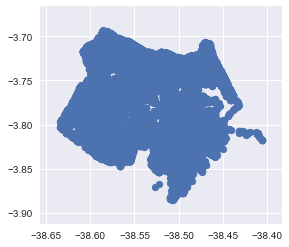

In [23]:
merged_gdf.plott()